In [1]:
pip install numpy pandas matplotlib seaborn wordcloud nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from  wordcloud import wordcloud
import nltk
nltk.download(['stopwords',
               'punkt',
               'wordnet',
               'omw-1.4',
               'vader_lexicon'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
import sklearn as sk

In [4]:
stop_words =nltk.corpus.stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()

print(sentiment.polarity_scores("This move is great"))
print(sentiment.polarity_scores("This move is not great"))


{'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'compound': 0.6249}
{'neg': 0.452, 'neu': 0.548, 'pos': 0.0, 'compound': -0.5096}


In [6]:

British_Airways = pd.read_csv('British_Airway_Review.csv')


In [7]:
British_Airways.describe()

,stars
count,2500.000000
mean,4.272000
std,2.135378
min,1.000000
25%,3.000000
50%,3.000000
75%,5.000000
max,9.000000


In [8]:
British_Airways.shape

(2500, 8)

In [9]:
British_Airways.head()

,reviews,date,country,seat_type,recommended,stars,route,type_of_traveller
0,✅ Trip Verified | I had the most fantastic BA...,1st August 2023,Hong Kong,Business Class,yes,5,Heathrow to Las Vegas,Family Leisure
1,✅ Trip Verified | Couldn’t book in online. Ar...,31st July 2023,United Kingdom,Economy Class,no,3,Rome to Heathrow,Solo Leisure
2,✅ Trip Verified | London Heathrow to Mumbai in...,31st July 2023,Iceland,Business Class,yes,3,Gatwick to Venice,Solo Leisure
3,"✅ Trip Verified | Keflavík, Iceland to London ...",31st July 2023,Iceland,Business Class,yes,5,London to Luanda,Couple Leisure
4,✅ Trip Verified | Terrible Experience with Bri...,29th July 2023,Canada,Economy Class,no,5,Denver to Heathrow,Family Leisure


In [10]:
British_Airways['reviews'] = British_Airways['reviews'].str.replace('✅ Trip Verified', '')
British_Airways['reviews'] = British_Airways['reviews'].str.replace('\|', '')
British_Airways


C:\Users\User\AppData\Local\Temp\ipykernel_2172\899835703.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  British_Airways['reviews'] = British_Airways['reviews'].str.replace('\|', '')


,reviews,date,country,seat_type,recommended,stars,route,type_of_traveller
0,I had the most fantastic BA Flight today. T...,1st August 2023,Hong Kong,Business Class,yes,5,Heathrow to Las Vegas,Family Leisure
1,Couldn’t book in online. Arrived at check i...,31st July 2023,United Kingdom,Economy Class,no,3,Rome to Heathrow,Solo Leisure
2,London Heathrow to Mumbai in a Boeing 787-8 ...,31st July 2023,Iceland,Business Class,yes,3,Gatwick to Venice,Solo Leisure
3,"Keflavík, Iceland to London Heathrow on an A...",31st July 2023,Iceland,Business Class,yes,5,London to Luanda,Couple Leisure
4,Terrible Experience with British Airways. I ...,29th July 2023,Canada,Economy Class,no,5,Denver to Heathrow,Family Leisure
...,...,...,...,...,...,...,...,...
2495,Roundtrip with British Airways from Bangkok to...,12th November 2015,Thailand,Business Class,no,7,BKK to LHR,Business
2496,Awful customer service. My wife and I have flo...,11th November 2015,United Kingdom,Business Class,no,3,London to Tampa,Couple Leisure
2497,I travelled from London to Sydney via Singapor...,10th November 2015,Australia,First Class,yes,5,London to Sydney,Couple Leisure
2498,British Airways have just moved Cape Town flig...,10th November 2015,United Kingdom,First Class,yes,3,LHR to CPT,Couple Leisure


In [11]:

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()
sia = SentimentIntensityAnalyzer() 




    

In [12]:
British_Airways['compound'] = [sia.polarity_scores(review)['compound'] for review in British_Airways['reviews']]
British_Airways['neg'] = [sia.polarity_scores(review)['neg'] for review in British_Airways['reviews']]
British_Airways['neu'] = [sia.polarity_scores(review)['neu'] for review in British_Airways['reviews']]
British_Airways['pos'] = [sia.polarity_scores(review)['pos'] for review in British_Airways['reviews']]

In [13]:
British_Airways.head()

,reviews,date,country,seat_type,recommended,stars,route,type_of_traveller,compound,neg,neu,pos
0,I had the most fantastic BA Flight today. T...,1st August 2023,Hong Kong,Business Class,yes,5,Heathrow to Las Vegas,Family Leisure,0.9927,0.014,0.754,0.232
1,Couldn’t book in online. Arrived at check i...,31st July 2023,United Kingdom,Economy Class,no,3,Rome to Heathrow,Solo Leisure,0.5709,0.079,0.792,0.129
2,London Heathrow to Mumbai in a Boeing 787-8 ...,31st July 2023,Iceland,Business Class,yes,3,Gatwick to Venice,Solo Leisure,0.9708,0.058,0.742,0.200
3,"Keflavík, Iceland to London Heathrow on an A...",31st July 2023,Iceland,Business Class,yes,5,London to Luanda,Couple Leisure,-0.2263,0.068,0.872,0.061
4,Terrible Experience with British Airways. I ...,29th July 2023,Canada,Economy Class,no,5,Denver to Heathrow,Family Leisure,-0.4365,0.040,0.930,0.030


In [14]:
British_Airways[['compound', 'neg', 'neu', 'pos']].describe()

,compound,neg,neu,pos
count,2500.000000,2500.000000,2500.000000,2500.000000
mean,0.111610,0.081120,0.813451,0.105438
std,0.782271,0.053684,0.071414,0.078492
min,-0.997400,0.000000,0.436000,0.000000
25%,-0.771700,0.043000,0.770000,0.049000
50%,0.318100,0.074000,0.819000,0.089000
75%,0.913700,0.111000,0.864000,0.146000
max,0.999200,0.348000,1.000000,0.490000


<Axes: xlabel='compound', ylabel='Count'>

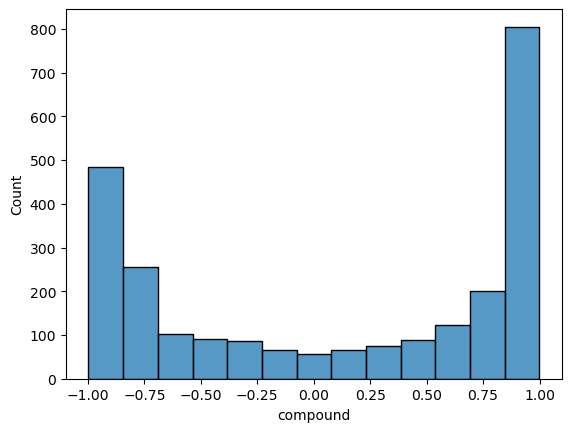

In [15]:
sns.histplot(British_Airways['compound'])

<Axes: xlabel='pos', ylabel='Count'>

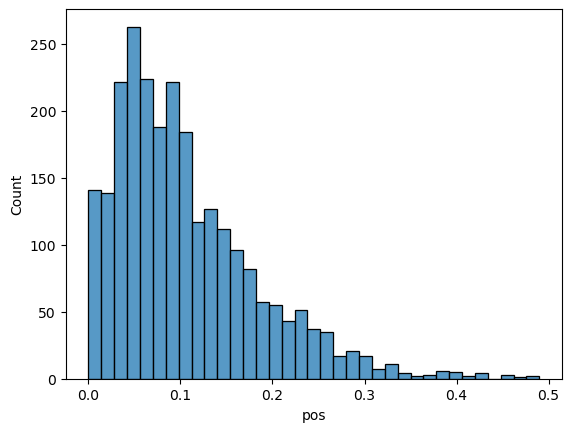

In [16]:
sns.histplot(British_Airways['pos'])

<Axes: xlabel='neg', ylabel='Count'>

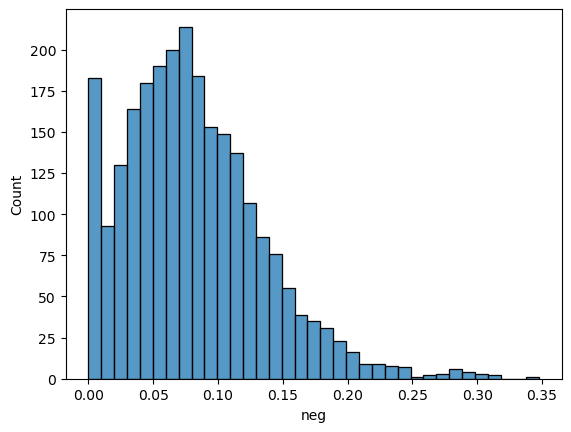

In [17]:
sns.histplot(British_Airways['neg'])

<Axes: xlabel='neu', ylabel='Count'>

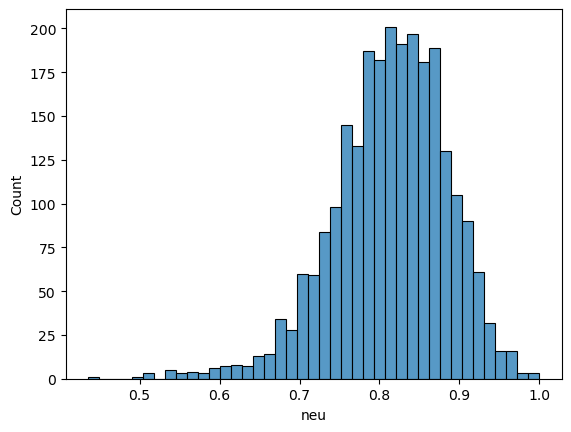

In [18]:
sns.histplot(British_Airways['neu'])

In [19]:
#negative reviews

(British_Airways['compound']<0).groupby(British_Airways['recommended']).sum()

recommended
no     1046
yes      69
Name: compound, dtype: int64

In [20]:
import pandas as pd



# Calculate the percentage of negative reviews for each review
percent_negative = (British_Airways['compound'] <= 0).groupby(British_Airways['recommended']).mean() * 100

# Sort the values by the percentage of negative reviews
percent_negative = percent_negative.sort_values(ascending=False)

# Display the result
print(percent_negative)


recommended
no     65.000000
yes     7.840909
Name: compound, dtype: float64


In [21]:
# Apply text preprocessing to the 'processed_review' column
British_Airways['Processed_reviews'] = British_Airways['reviews']

# Create subsets based on seat type and sentiment
positive_reviews = British_Airways['reviews'][British_Airways['compound'] > 0].tolist()
negative_reviews = British_Airways['reviews'][British_Airways['compound'] <= 0].tolist()




In [22]:
positive_reviews = British_Airways['reviews'][British_Airways['compound'] > 0].tolist()
negative_reviews = British_Airways['reviews'][British_Airways['compound'] <= 0].tolist()


In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

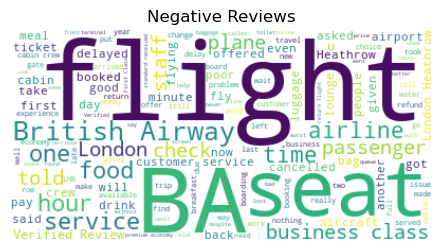

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


negative_reviews = [word for review in British_Airways['reviews'][British_Airways['compound'] <= 0].dropna() for word in review.split()]

# Generate the word clouds
wordcloud_negative = WordCloud(background_color='white').generate(' '.join(negative_reviews))

# Display the word clouds using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Negative Reviews')
plt.axis('off')

plt.show()



(-0.5, 399.5, 199.5, -0.5)

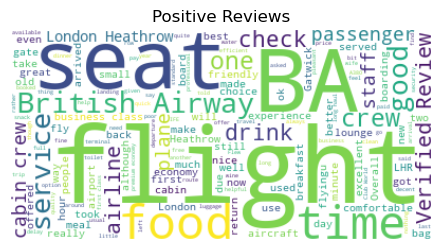

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 'reviews' is the column containing text data
positive_reviews = [word for review in British_Airways['reviews'][British_Airways['compound'] > 0].dropna() for word in review.split()]

# Generate the word clouds
wordcloud_positive = WordCloud(background_color='white').generate(' '.join(positive_reviews))

# Display the word clouds using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Positive Reviews')
plt.axis('off')

In [26]:
from nltk import FreqDist
from nltk.tokenize import word_tokenize
positive_reviews = ' '.join(British_Airways['reviews'][British_Airways['compound'] > 0].dropna())

# Tokenize the combined positive reviews
positive_tokens = word_tokenize(positive_reviews)

# Create a frequency distribution for positive reviews
freq_dist_positive = FreqDist(positive_tokens)

# Display the most common words in positive reviews
print(freq_dist_positive.most_common(10))


[('.', 13176), ('the', 9458), ('and', 7209), ('to', 7056), (',', 6818), ('was', 5235), ('a', 5109), ('I', 4186), ('of', 3255), ('in', 2957)]


In [27]:
from nltk import FreqDist
from nltk.tokenize import word_tokenize

negative_reviews = ' '.join(British_Airways['reviews'][British_Airways['compound'] <= 0].dropna())
negative_tokens = word_tokenize(negative_reviews)

# Create a frequency distribution for negative reviews
freq_dist_negative = FreqDist(negative_tokens)

# Display the most common words in negative reviews
print(freq_dist_negative.most_common(10))


[('.', 10978), ('the', 8085), ('to', 7214), ('and', 5365), (',', 5266), ('I', 4213), ('a', 4103), ('was', 3834), ('of', 2671), ('in', 2527)]


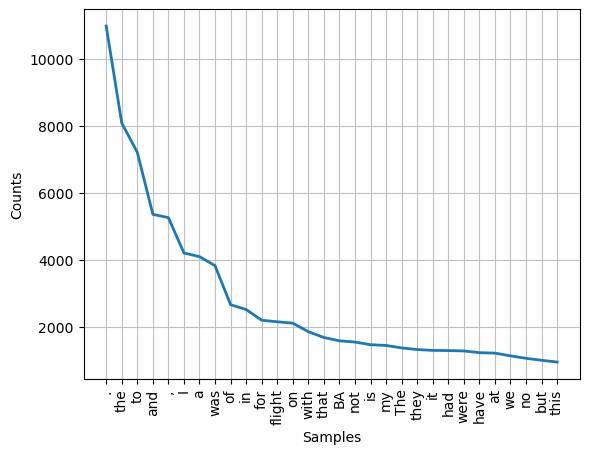

<Axes: xlabel='Samples', ylabel='Counts'>

In [31]:
freq_dist_negative.plot(30)

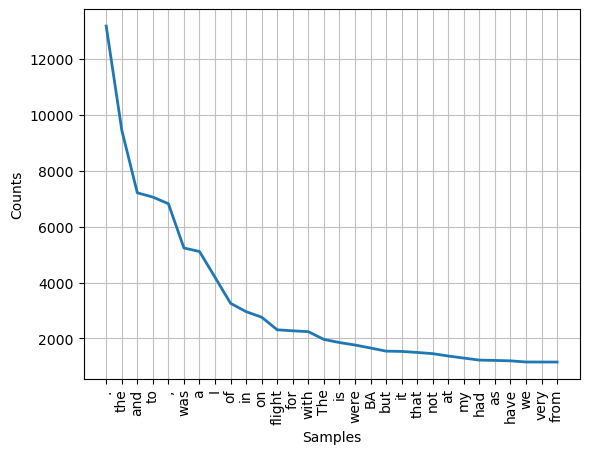

<Axes: xlabel='Samples', ylabel='Counts'>

In [33]:
freq_dist_positive.plot(30)